# Boolean generator 1 (version 1):

Generating sentences of the form

- **A, not A** (contradiction)

- **A, not B** (non-contradiction)




In [1]:
import numpy as np
import pandas as pd
from word_lists import name_list, positive_personality_list
import os
import inspect
import sys
import itertools

almost_current = os.path.abspath(inspect.getfile(inspect.currentframe()))
currentdir = os.path.dirname(almost_current)
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from plots.functions import plot_histogram_from_labels # noqa

% matplotlib inline


### Generating all combinations between names and predicates

In [2]:
boolean_iter = itertools.product(name_list, positive_personality_list)
boolean_list = list(boolean_iter)

print("The total number of combinations between names and predicates is {}".format(len(boolean_list)))

The total number of combinations between names and predicates is 33396


### Generating a train DataFrame with 10000 examples and a test DataFrame with 1000 examples 

In [3]:
positives = []
negatives = []

for car, cdr in boolean_list:
    positive = "{} is {}".format(car, cdr)
    negative = "{} is not {}".format(car, cdr)
    positives.append(positive)
    negatives.append(negative)
    
both = list(zip(positives, negatives))

np.random.shuffle(both)

sentence_1 = []
sentence_2 = []
label = []

for i in range(11000):
    if i % 2 ==0:
        sentence_1.append(both[i][0])
        sentence_2.append(both[i][1])
        label.append(1)
    else:
        sentence_1.append(both[i][0])
        new_i = i
        while new_i == i:
            new_i = np.random.randint(0, len(both))
        sentence_2.append(both[new_i][1])
        label.append(0)
        
df_dict = {"sentence1": sentence_1,
           "sentence2": sentence_2,
           "label": label}
        
df = pd.DataFrame(df_dict)
df = df[["sentence1", "sentence2", "label"]]
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.iloc[:10000]
df_test = df.iloc[10000:]

df.tail()    

,sentence1,sentence2,label
10995,Shelton is calm,Spalding is not proud,0
10996,Kendra is victorious,Augustine is not proud,0
10997,Kirby is victorious,Ferebee is not calm,0
10998,Benton is ambitious,Brawley is not eager,0
10999,Landry is lively,Landry is not lively,1


#### Looking at the label distribution

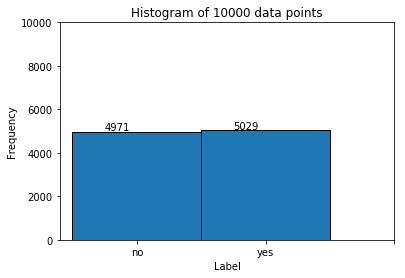

In [16]:
train_label = df_train["label"].values
plot_histogram_from_labels(train_label, ["no", "yes"], "b1_train.png")

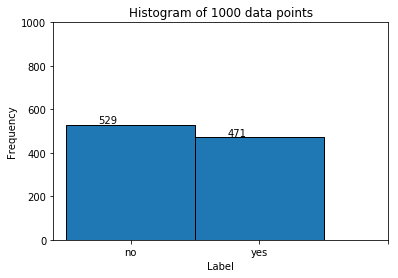

In [18]:
test_label = df_test["label"].values
plot_histogram_from_labels(test_label, ["no", "yes"], "b1_test.png")

### Saving to CSV

In [20]:
df_train.to_csv("b1_v1_train.csv", index=False)
df_test.to_csv("b1_v1_test.csv", index=False)